In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)
import datetime as dt
#pd.options.display.float_format = '{:,.0f}'.format
plt.rcParams['figure.figsize'] = (8, 6)

# region_sector_funda_net_degree_3

In [2]:
df = pd.read_pickle('region_sector_funda_net_degree_3.pkl')

In [3]:
len(df['cusip_9'].unique())

13976

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Columns: 142 entries, cusip_9 to Western Non-European Union
dtypes: datetime64[ns](1), float64(85), int64(1), object(6), uint8(49)
memory usage: 48.5+ MB


# sic

In [5]:
sic_us = pd.read_sas('sic_us.sas7bdat',encoding='iso-8859-1' )

In [6]:
sic_intl = pd.read_sas('sic_intl.sas7bdat', encoding='iso-8859-1')

In [7]:
sic_us = sic_us.drop_duplicates(subset='CUSIP', keep = 'last')

In [8]:
sic_intl = sic_intl.drop_duplicates(subset='CUSIP', keep = 'last')

In [9]:
sic_us.head()

,FS_PERM_SEC_ID,DATE,CUSIP,ISIN,PRIMARY_SIC_CODE
14,HKS27K-S-US,2016-12-31,170386106,US1703861062,6712
29,T1N9J9-S-US,2016-12-31,336901103,US3369011032,6712
36,MMCW7F-S,2012-12-31,FDSEFB642,NaN,6519
38,RH470W-S,2003-03-31,FDSA783F4,NaN,6512
46,M4VHN4-S-US,2009-05-31,885535104,US8855351040,7371


In [171]:
sic_intl.head()

,FS_PERM_SEC_ID,DATE,CUSIP,ISIN,PRIMARY_SIC_CODE
11,M3R9F1-S-AU,2015-12-31,U01347100,AU000000AAI6,3355
21,DYZ5VS-S-US,2011-12-31,032015703,US0320157037,6799
32,KB3YPS-S-US,2013-12-31,G0471F109,KYG0471F1090,1311
47,RS2DJW-S-NL,2016-12-31,N07059202,NL0010273215,3559
62,WGLY6Z-S-GB,2016-12-31,G1510J102,GB0002875804,2121


In [10]:
sic = pd.concat([sic_us, sic_intl])

In [11]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73385 entries, 14 to 503867
Data columns (total 5 columns):
FS_PERM_SEC_ID      73385 non-null object
DATE                73385 non-null datetime64[ns]
CUSIP               73383 non-null object
ISIN                69045 non-null object
PRIMARY_SIC_CODE    73255 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 3.4+ MB


In [13]:
sic_selected = sic[['CUSIP','ISIN','PRIMARY_SIC_CODE']]

In [15]:
sic_selected = sic_selected.rename(columns={"PRIMARY_SIC_CODE": "sic_code"})

In [18]:
sic_selected = sic_selected.rename(columns={"CUSIP": "cusip_9"})

In [19]:
sic_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73385 entries, 14 to 503867
Data columns (total 3 columns):
cusip_9     73383 non-null object
ISIN        69045 non-null object
sic_code    73255 non-null object
dtypes: object(3)
memory usage: 2.2+ MB


In [20]:
sic_selected.head()

,cusip_9,ISIN,sic_code
14,170386106,US1703861062,6712
29,336901103,US3369011032,6712
36,FDSEFB642,NaN,6519
38,FDSA783F4,NaN,6512
46,885535104,US8855351040,7371


# cusip_sic

In [21]:
cusip_sic = pd.merge(df, sic_selected, how = 'inner', on = 'cusip_9')

In [27]:
cusip_sic['sic_code'] = cusip_sic['sic_code'].astype(int)

In [22]:
cusip_sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Columns: 144 entries, cusip_9 to sic_code
dtypes: datetime64[ns](1), float64(85), int64(1), object(8), uint8(49)
memory usage: 49.4+ MB


In [41]:
cusip_sic.head()

,cusip_9,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,average_neighbor_degree,square_clustering,core_number,...,Southern European Union,Southern Non-European Union,United States and Canada,Western Africa,Western European Union,Western Middle East,Western Non-European Union,ISIN,sic_code,sector_A
0,000360206,0.000848,0.000000,0.000000,0.0,6.336145e-17,0.00000,2.000000,0.0,3.0,...,0,0,0,0,0,1,0,US0003602069,6719,"Finance, Insurance and Real Estate"
1,000360206,0.000813,0.000000,0.000000,0.0,6.589818e-18,0.00000,1.666667,0.0,3.0,...,0,0,0,0,0,1,0,US0003602069,6719,"Finance, Insurance and Real Estate"
2,000360206,0.000506,0.000000,0.000000,0.0,3.436678e-16,0.00000,2.000000,0.0,2.0,...,0,0,0,0,0,1,0,US0003602069,6719,"Finance, Insurance and Real Estate"
3,000360206,0.000235,0.000000,0.000000,0.0,6.226451e-17,0.00000,3.000000,0.0,1.0,...,0,0,0,0,0,1,0,US0003602069,6719,"Finance, Insurance and Real Estate"
4,000361105,0.000000,0.000283,0.138689,0.0,6.321229e-03,548.41562,0.000000,0.0,1.0,...,0,0,0,0,0,1,0,US0003611052,5088,Wholesale Trade


In [28]:
def group_trans(num):
    if num > 1 and num <= 999: return 'Agriculture, Forestry and Fishing'
    elif num >= 1000 and num <= 1499: return 'Mining'
    elif num >= 1500 and num <= 1799: return 'Construction'
    elif num >= 1800 and num <= 1999: return 'not used'
    elif num >= 2000 and num <= 3999: return 'Manufacturing'
    elif num >= 4000 and num <= 4999: return 'TCEGS'
    elif num >= 5000 and num <= 5199: return 'Wholesale Trade'
    elif num >= 5200 and num <= 5999: return 'Retail Trade'
    elif num >= 6000 and num <= 6799: return 'Finance, Insurance and Real Estate'
    elif num >= 7000 and num <= 8999: return 'Services'
    elif num >= 9000 and num <= 9729: return 'Public Administration'
    else: return 'Nonclassifiable'

#net_deg['in_group'] = net_deg['in_diff'].map(group_trans)
cusip_sic['sector_A'] = cusip_sic['sic_code'].map(group_trans)

In [31]:
cusip_sic.to_excel('cusip_sic.xlsx')

In [42]:
cusip_isin_sic = cusip_sic[['cusip_9', 'ISIN', 'sic_code', 'region','sector_A']]

In [43]:
cusip_isin_sic = cusip_isin_sic.drop_duplicates(subset='cusip_9', keep = 'last')

In [48]:
cusip_isin_sic.to_excel('cusip_isin_sic.xlsx')

In [44]:
cusip_isin_sic.head()

,cusip_9,ISIN,sic_code,region,sector_A
3,000360206,US0003602069,6719,Western Middle East,"Finance, Insurance and Real Estate"
16,000361105,US0003611052,5088,Western Middle East,Wholesale Trade
29,001084102,US0010841023,3523,Western Middle East,Manufacturing
42,00108M102,US00108M1027,3663,United States and Canada,Manufacturing
55,001204106,US0012041069,4924,United States and Canada,TCEGS


In [45]:
len(cusip_isin_sic['sic_code'].unique())

815

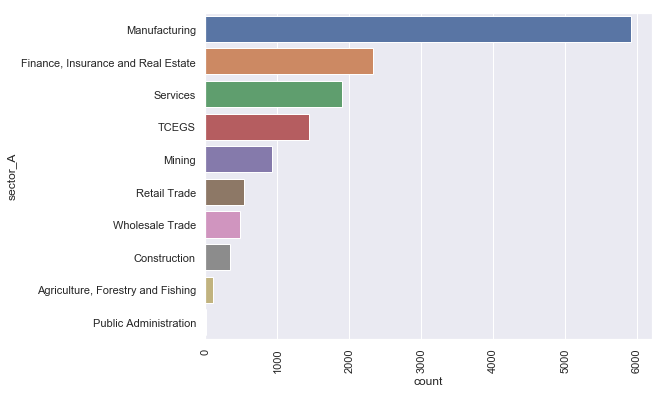

In [63]:
import seaborn as sns

ax = sns.countplot(y="sector_A", data=cusip_isin_sic,
                  order = cusip_isin_sic['sector_A'].value_counts().index)
for item in ax.get_xticklabels():
    item.set_rotation(90)
#plt.show()
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('setcors.png', dpi=400, bbox_inches = 'tight')

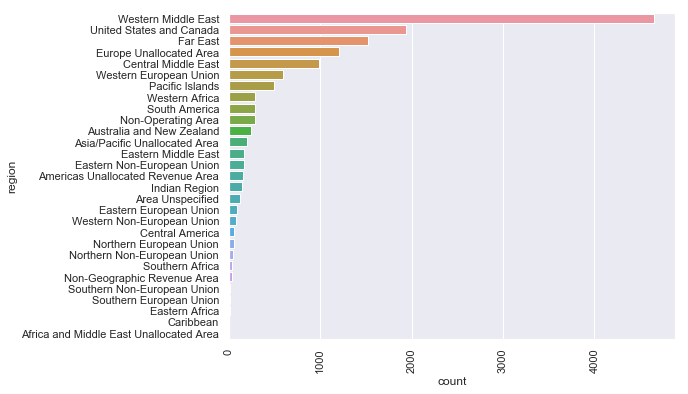

In [62]:
import seaborn as sns

ax = sns.countplot(y="region", data=cusip_isin_sic,
                  order = cusip_isin_sic['region'].value_counts().index)
for item in ax.get_xticklabels():
    item.set_rotation(90)
#plt.show()
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('region.png', dpi=400, bbox_inches = 'tight')